In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [14]:
# load the iris dataset
ds = load_iris()
print(ds.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print(ds['target_names'])

['setosa' 'versicolor' 'virginica']


In [16]:
# assign the feature matrix X and the target vector y
X = ds['data'] 
y = ds['target']

In [17]:
print(f'THE SHAPE OF X IS {X.shape}')
print(f'THE SHAPE OF y IS {y.shape}')

THE SHAPE OF X IS (150, 4)
THE SHAPE OF y IS (150,)


In [18]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
text_display = export_text(dtc, feature_names=ds['feature_names'])
print(f'THE TREE STRUCTURE IS \n{text_display}')

THE TREE STRUCTURE IS 
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



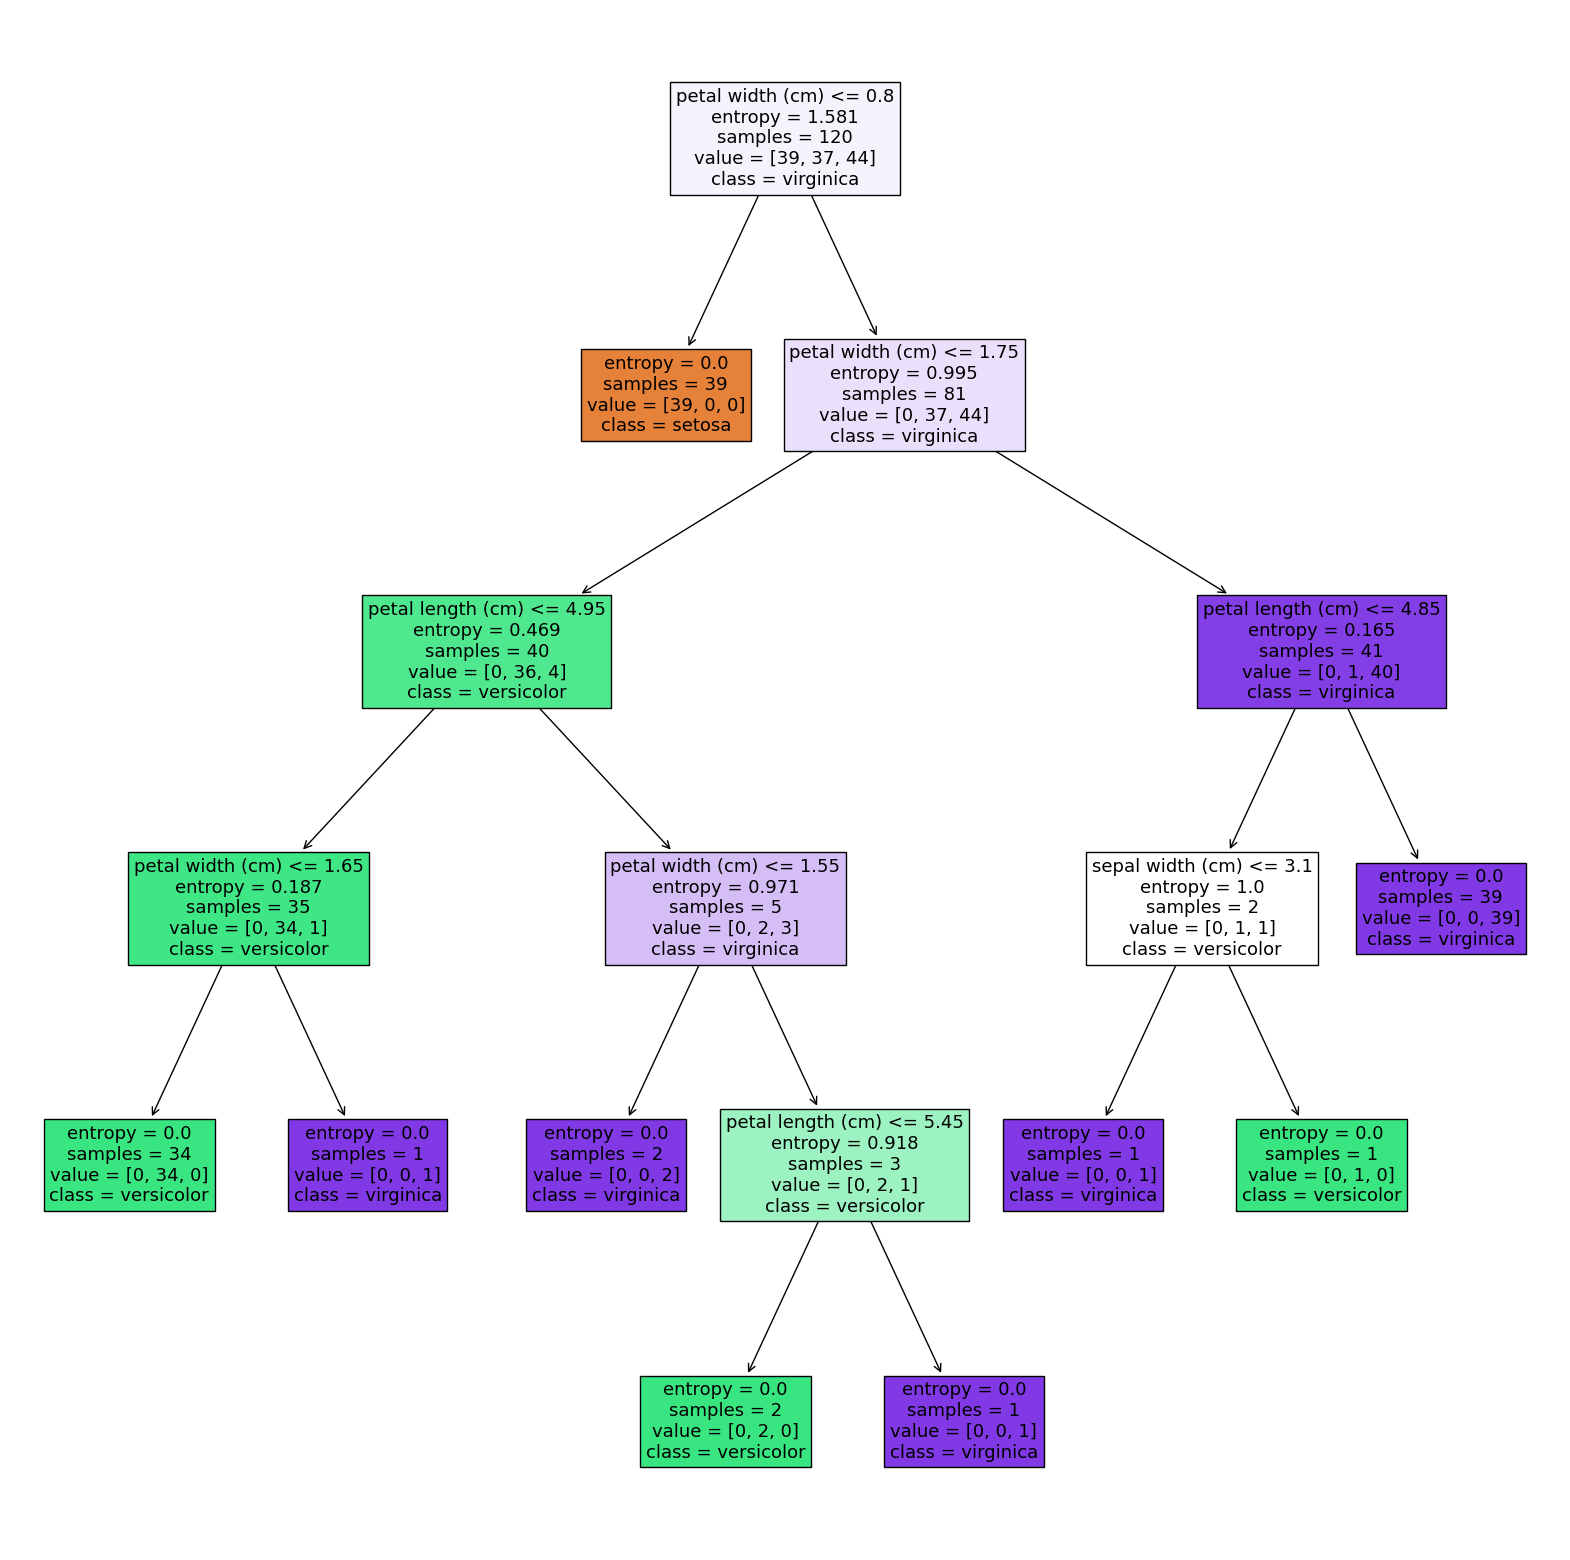

In [27]:
# Plot the samples
plt.figure(figsize=(20, 20))
plt.tree = plot_tree(dtc, feature_names=ds['feature_names'], class_names=ds['target_names'], filled=True, fontsize=13)
plt.show()